In [1]:
from common.DeepLab import *
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import cv2
import sys

In [2]:
#Τίποτα ιδιαίτερο.Κάνει open και MODEL.run
def getFeature(nameOfImage,MODEL):
	#We just need to MODEL.run(original_im) and get the seg_map this time.
	try:
		original_im = Image.open(nameOfImage)
	except IOError:
		print("Image with name "+nameOfImage+" not found!")
		return
	print("Running deeplab on image %s..." % nameOfImage)
	return MODEL.run(original_im)

In [3]:
#https://github.com/dip-course/pca_on_deepfeatures/blob/master/pca.ipynb
#Η perform_pca του παραδείγματος
def perform_pca(deepfeats,d):
	N = deepfeats.shape[0]*deepfeats.shape[1]
	C = deepfeats.shape[-1]
	X = np.reshape(deepfeats, [N, C])
	print('Τα αρχικά δεδομένα μου έχουν μέγεθος: {}'.format(X.shape))
	Xreduced = PCA(n_components=d).fit_transform(X)
	print('Μετά το PCA έχουμε μέγεθος: {}'.format(Xreduced.shape))
	return Xreduced

In [4]:
#H run_visualization με χρήση plt και με cv2 αντίστοιχα.
def run_visualization(after_pca, deepfeats):
	deepfeats_reduced = np.reshape(
		after_pca, [deepfeats.shape[0], deepfeats.shape[1], 3])
	plt.imshow(deepfeats_reduced)
	plt.show()
    
"""
def run_visualizationWithCV(after_pca, deepfeats):
	deepfeats_reduced = np.reshape(
		after_pca, [deepfeats.shape[0], deepfeats.shape[1], 3])
	cv2.imshow("Deep Features",deepfeats_reduced)
	cv2.waitKey()
	cv2.destroyAllWindows()
"""

'\ndef run_visualizationWithCV(after_pca, deepfeats):\n\tdeepfeats_reduced = np.reshape(\n\t\tafter_pca, [deepfeats.shape[0], deepfeats.shape[1], 3])\n\tcv2.imshow("Deep Features",deepfeats_reduced)\n\tcv2.waitKey()\n\tcv2.destroyAllWindows()\n'

Download completed! loading DeepLab model...
Model loaded successfully!
Running deeplab on image airplane.jpg...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Τα αρχικά δεδομένα μου έχουν μέγεθος: (4225, 256)
Μετά το PCA έχουμε μέγεθος: (4225, 3)


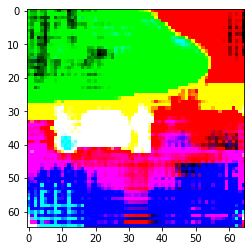

Running deeplab on image athens.jpg...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Τα αρχικά δεδομένα μου έχουν μέγεθος: (4225, 256)
Μετά το PCA έχουμε μέγεθος: (4225, 3)


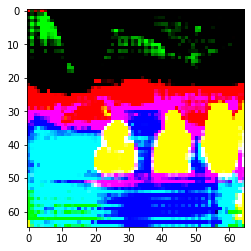

Running deeplab on image eating.jpg...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Τα αρχικά δεδομένα μου έχουν μέγεθος: (4225, 256)
Μετά το PCA έχουμε μέγεθος: (4225, 3)


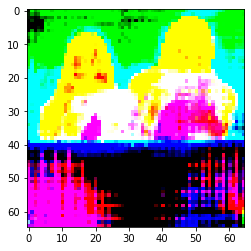

Running deeplab on image familywithdogs.jpg...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Τα αρχικά δεδομένα μου έχουν μέγεθος: (4225, 256)
Μετά το PCA έχουμε μέγεθος: (4225, 3)


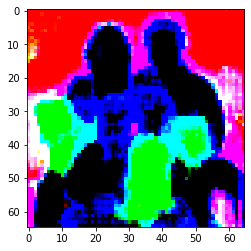

Running deeplab on image syntagma.jpg...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Τα αρχικά δεδομένα μου έχουν μέγεθος: (4225, 256)
Μετά το PCA έχουμε μέγεθος: (4225, 3)


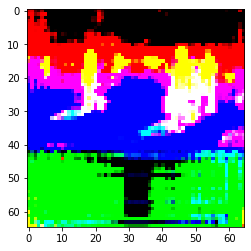

In [5]:
#Έχω αλλάξει το OUTPUT_TENSOR_NAME ώστε να μπορώ να κάνω PCA
#Παίρνω από την getFeature το seg_map ώστε να κάνω PCA με d = 3 (τροποποίηση)
#Παίρνω deepfeats και pcaResult για να βρω με βάση το παράδειγμα το deepfeats_reduced
#και να κάνω show.
def main():
	L = ["airplane.jpg","athens.jpg","eating.jpg","familywithdogs.jpg","syntagma.jpg"]
	if not L:
		print("Run : python first.py example1.jpg example2.jpg ...")
		return
	MODEL = getModel("mobilenetv2_coco_voctrainaug","concat_projection/Conv2D:0")
	for i in L:
		if os.path.isfile(i):
			deepfeats = getFeature(i, MODEL)[1]
			pcaResult = perform_pca(deepfeats,3)
			run_visualization(pcaResult, deepfeats)

if __name__ == "__main__":
	main()